# Group Project Advanced Topics in Machine Learning
### Group 6: Stefan Jonas, Simon Curty, Jonas Räber
### Book Covers

In [ ]:
In the scope of this project, we explore two tasks:

* Predicting a book's genre based on its cover.
* Generating book covers for a given genre.

A pretrained model, a dataset with the cover links and a selection of sample covers can be found [here](https://drive.google.com/drive/folders/1yoCxZrAMft0ifL6Imt3CRpUejWQZYO_C?usp=sharing).

Our dataset is based on the dataset compiled by:
* B. K. Iwana, S. T. Raza Rizvi, S. Ahmed, A. Dengel, and S. Uchida, **Judging a Book by its Cover**, arXiv (2016). (https://github.com/uchidalab/book-dataset)


## Downloading the covers
On the above linked drive only a sample set of covers can be found. However, we provide a script to download all covers from Amazon.

1. Download the prepared dataset (json file) from the drive or from github under `data/processed/`.
1. Run the cell below.

In [1]:
from utils.fetch_image import download_covers

json_file = 'data/processed/books_200000.json'
covers_save_dir = 'data/covers/coversraw'
log_dir = 'data/covers'

download_covers(json_file, covers_save_dir, log_dir, verbose=False)

Done


The covers will be converted to JPEGs while downloading. There is also a facility in place to convert already downloaded 
images to the JPEG-format.

In [6]:
from utils.convert_images import convert_to_jpeg
covers_save_dir = 'data/covers/coversraw'

convert_to_jpeg(covers_save_dir, verbose=False)

Done


Now the cover images have to be moved in folders accoring to their genre.

In [1]:
from utils.split_dataset import create_image_folders

covers_extension = '.jpeg'
covers_src_dir = 'data/covers/coversraw/'
covers_target_dir = 'data/covers/'
json_file = 'data/processed/books_200000.json'
test_split = .1
val_split = .1

create_image_folders(json_file, covers_src_dir, covers_target_dir, test_split, val_split)

Done


# Classification

In [ ]:
from classification import Classification
from utils_print import *

### Setup
network_name = 'alexnet' # 'alexnet' or 'densenet'
n_epochs = 10
data_path = 'data/covers/' # where the training data is located
meta_path = 'data/meta/' # where some meta files corresponding to the meta data are located
batch_size = 32
save_dir = 'parameters/sample/' # where the model parameter and metrics are saved to

classifier = Classification(data_path = data_path, meta_path = meta_path, batch_size = batch_size, save_dir=save_dir)

In [ ]:
### training
classifier.train(network_name=network_name, n_epochs = n_epochs, do_print = True)

In [ ]:
### test
# for testing the network is loaded from file. It is therefore possible to test trained Networks
# when choosing an apropriate save path.
save_dir = 'parameters/alex_2/'
test_classifier = Classification(data_path = data_path, meta_path = meta_path, batch_size = batch_size, save_dir=save_dir)
test_classifier.test(network_name = network_name)

In [ ]:
from utils_print import *

In [2]:
### Setup path of saved parameter files
savedir_alex = 'parameters/alex_2/'
dataset_alex_name = 'alexnet'

savedir_alexNorm = 'parameters/alex_normalized/'

savedir_dense = 'parameters/dense_2/'
dataset_dense_name = 'densenet'

savedir_denseNorm = 'parameters/dense_normalized/'

Top 1 accuracy: alexnet:28.5479, alexnet normalized:23.9437, densenet:30.7902, densenet normalized:26.9749
Top 3 accuracy: alexnet:48.5780, alexnet normalized:42.2076, densenet:51.4878, densenet normalized:47.7648


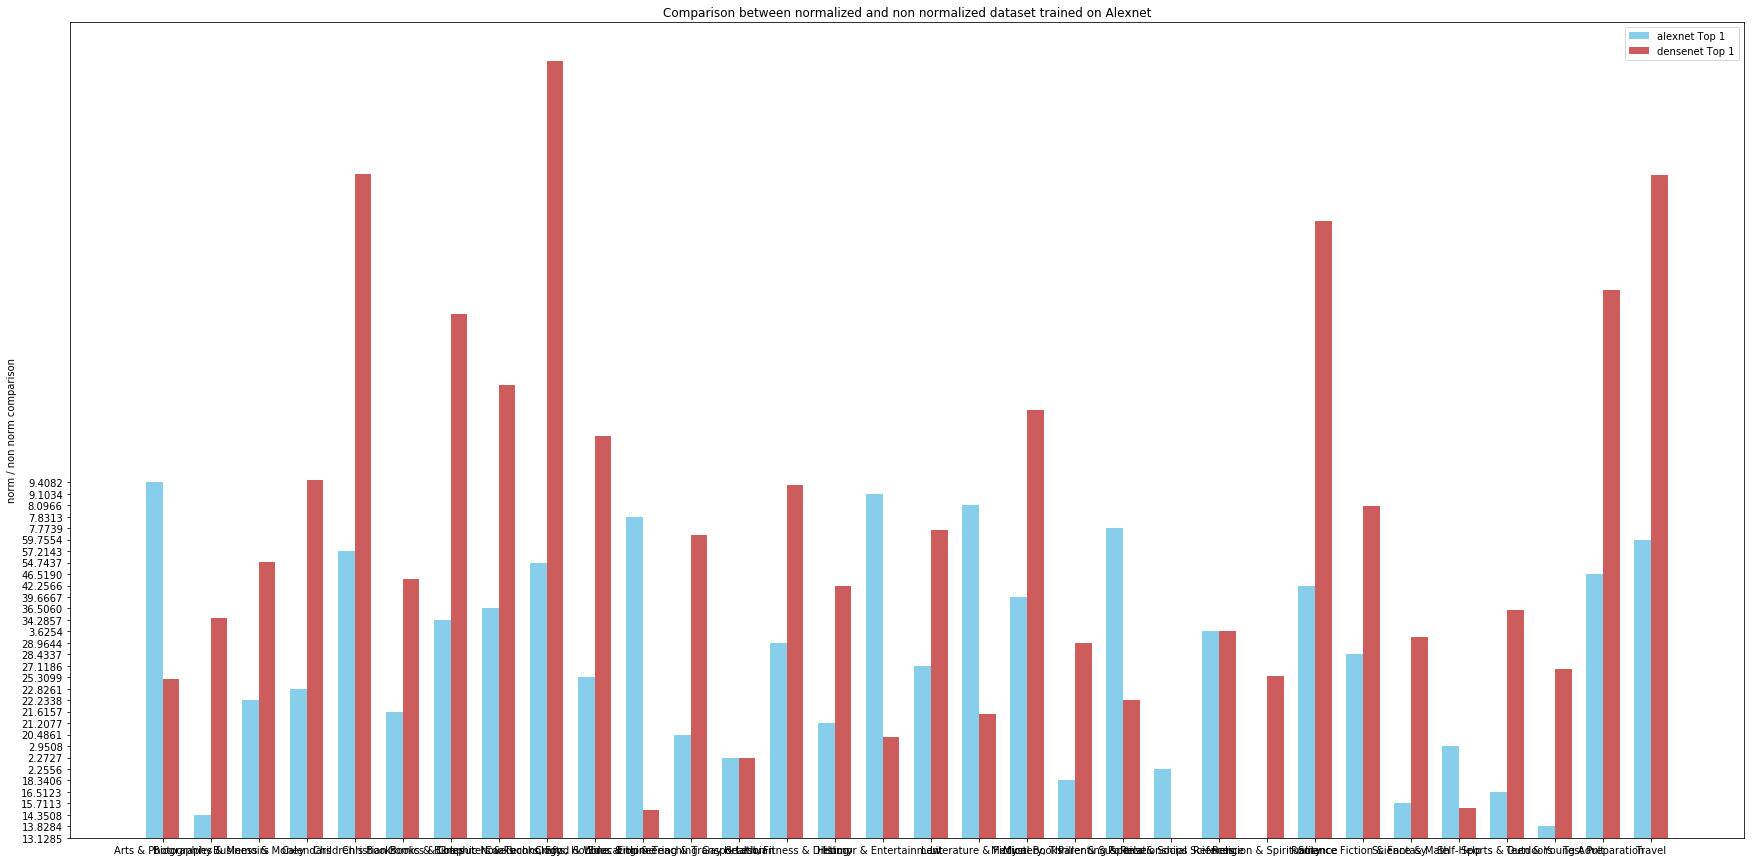

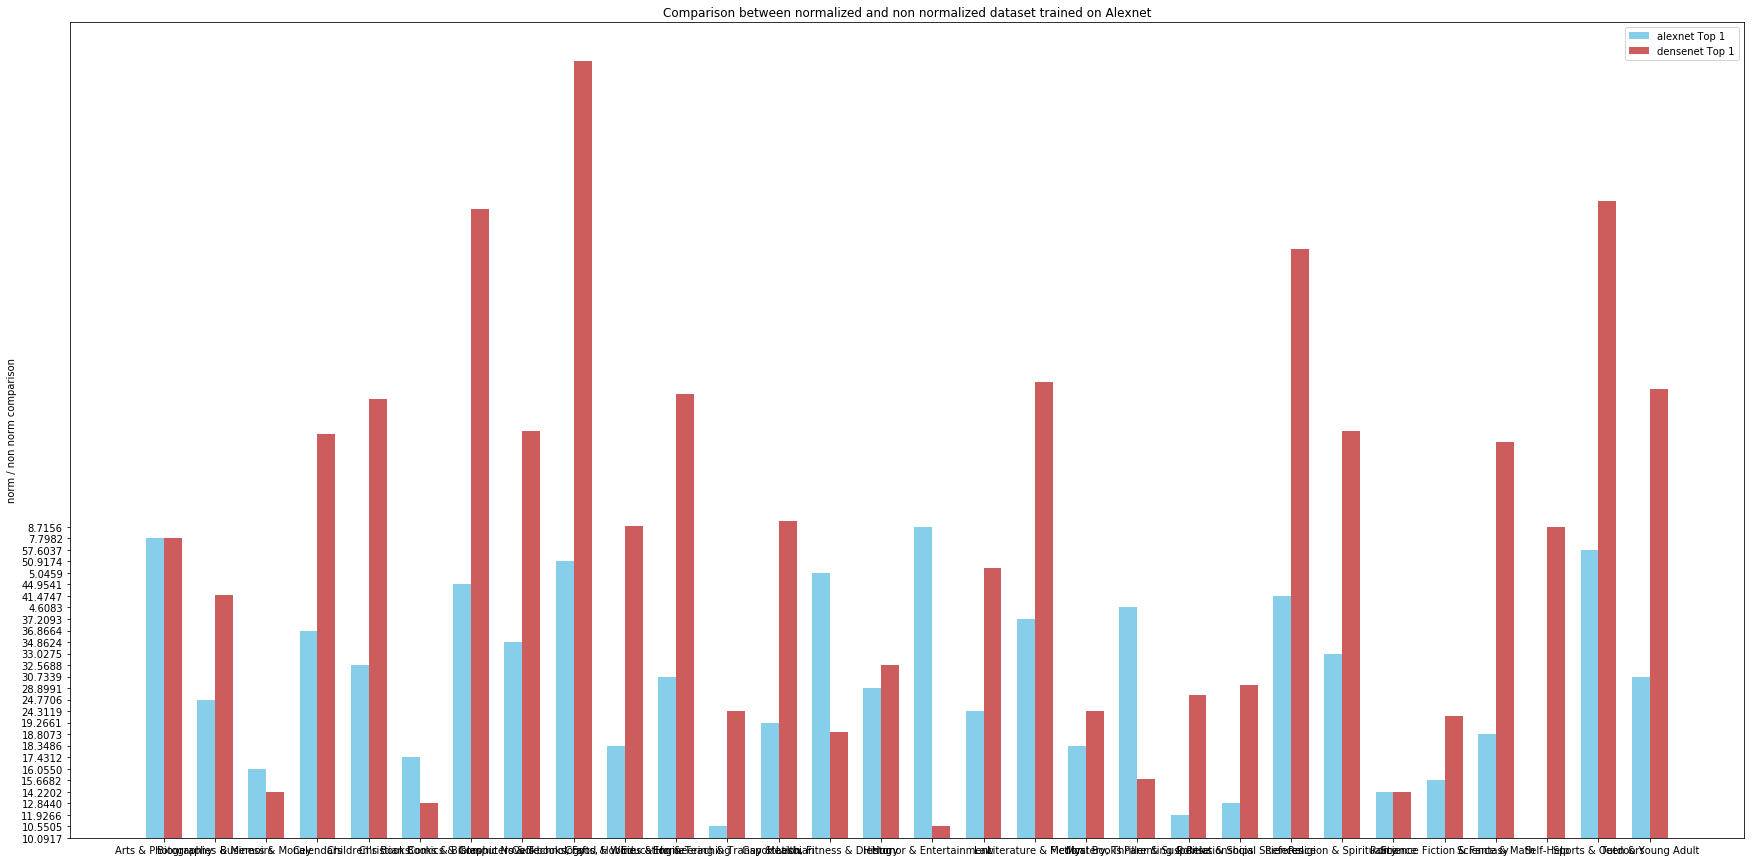

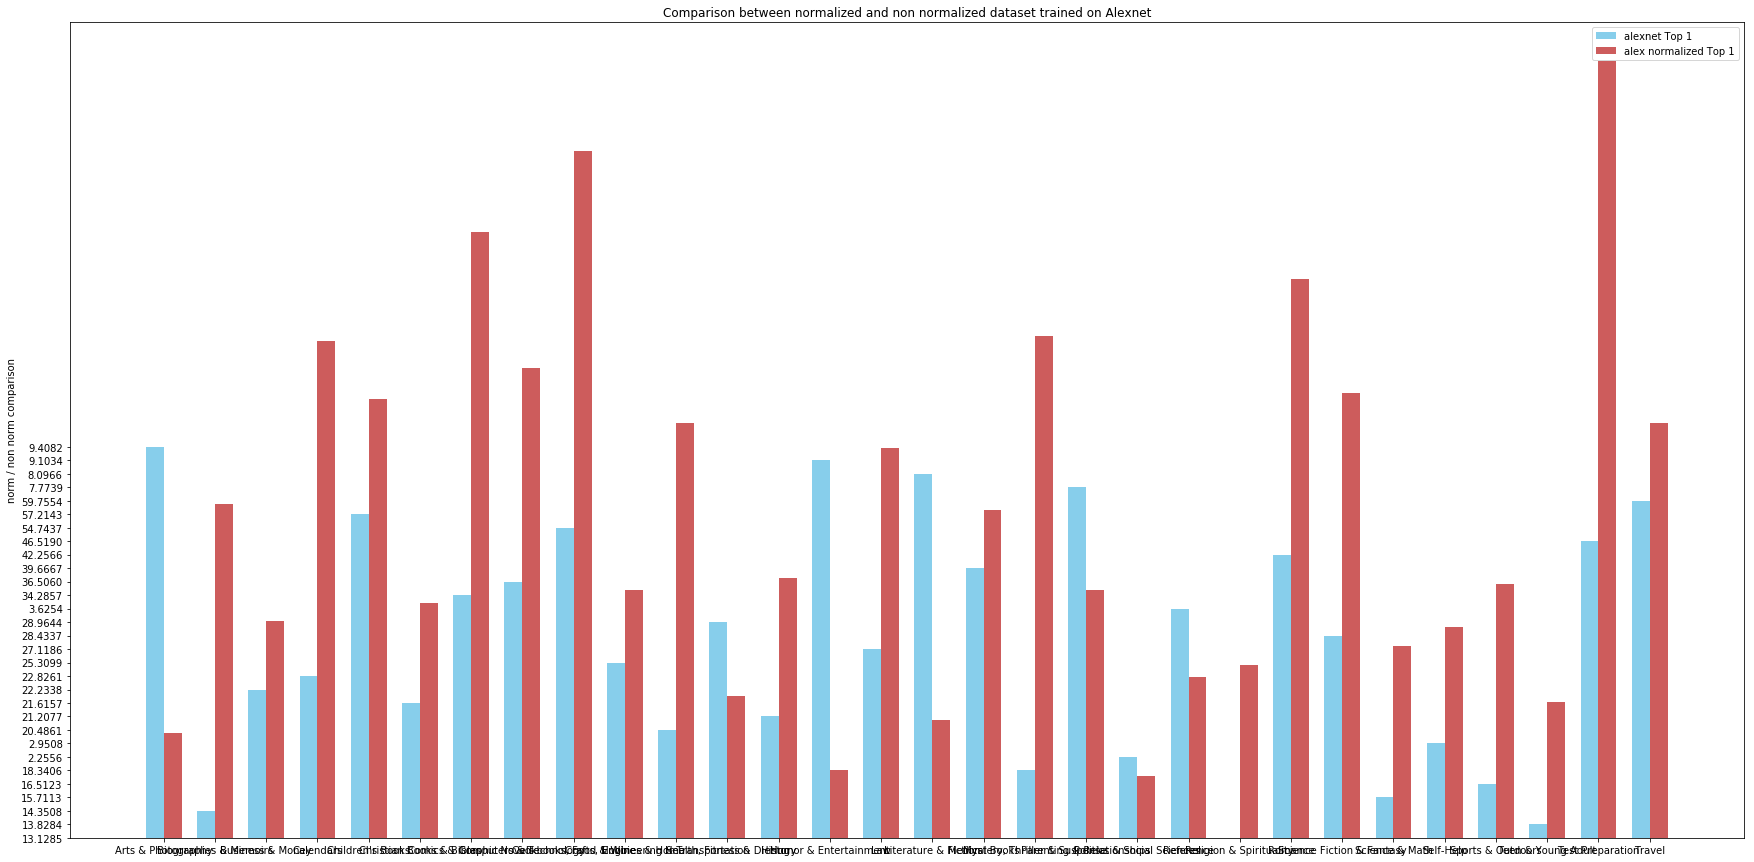

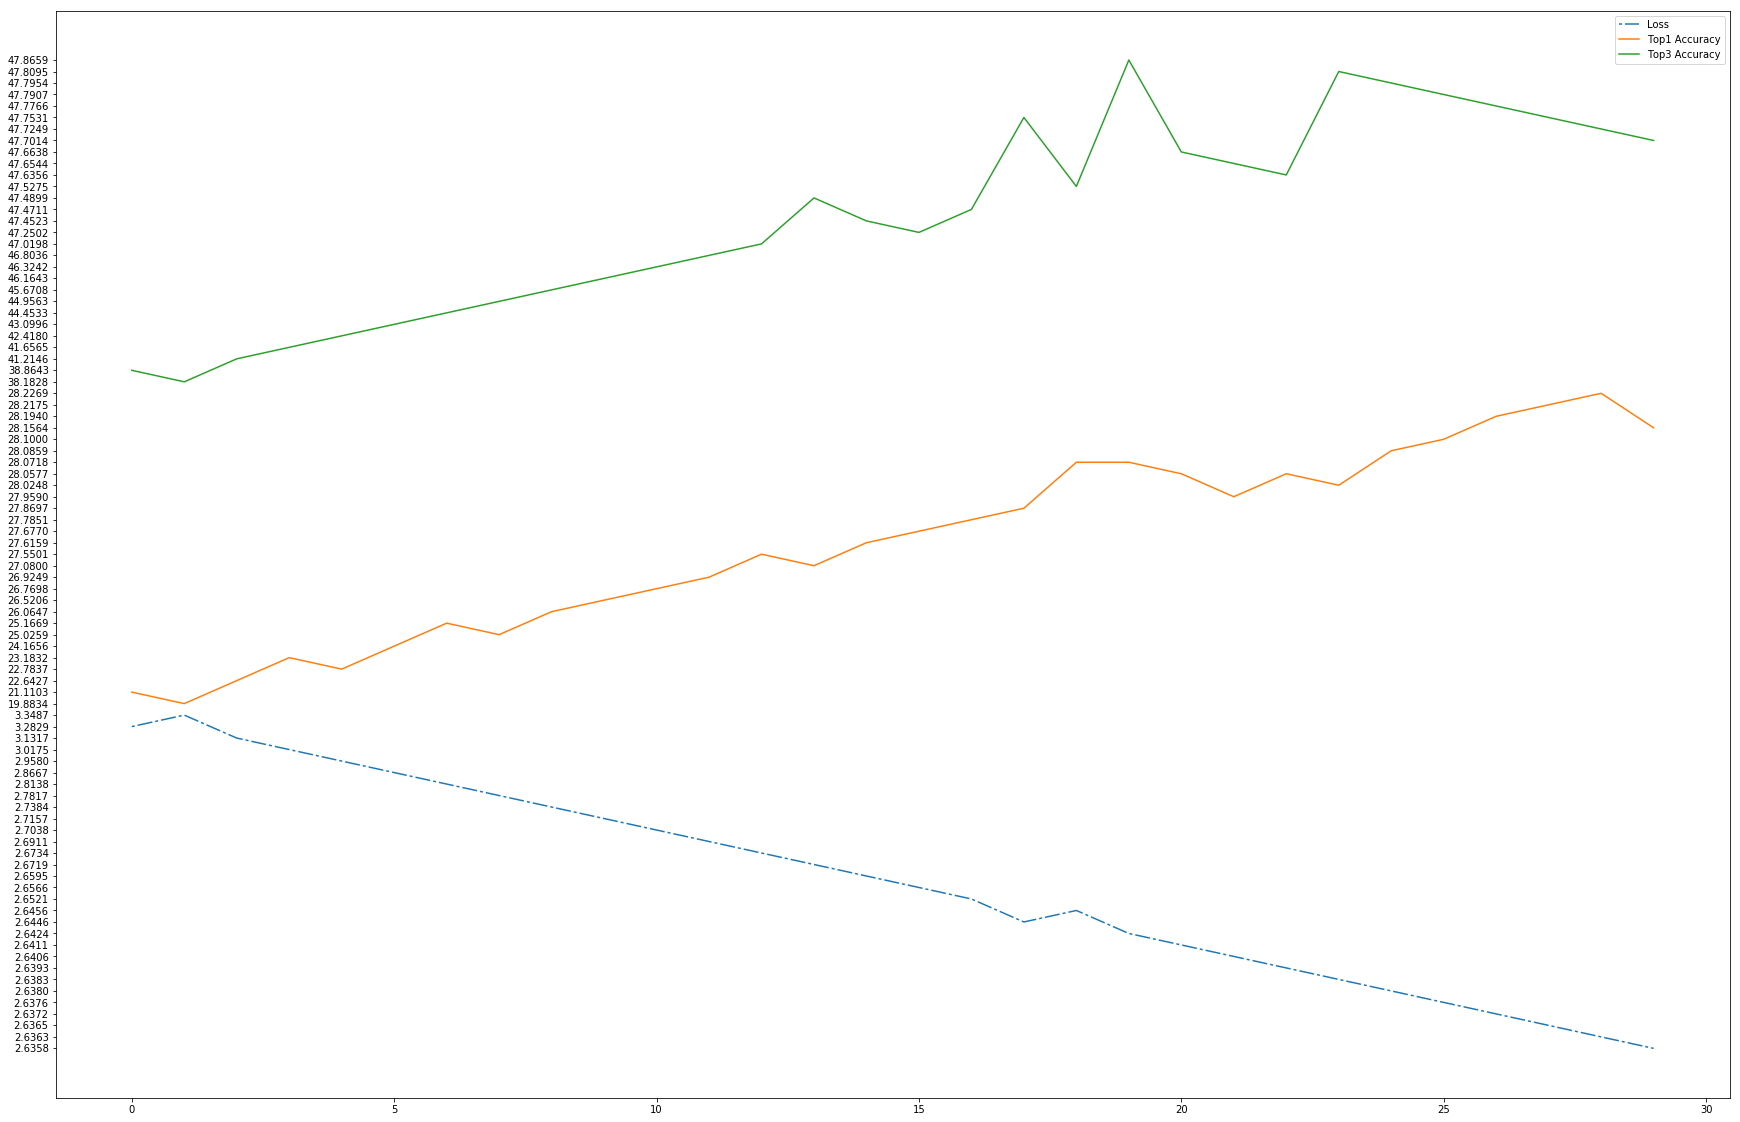

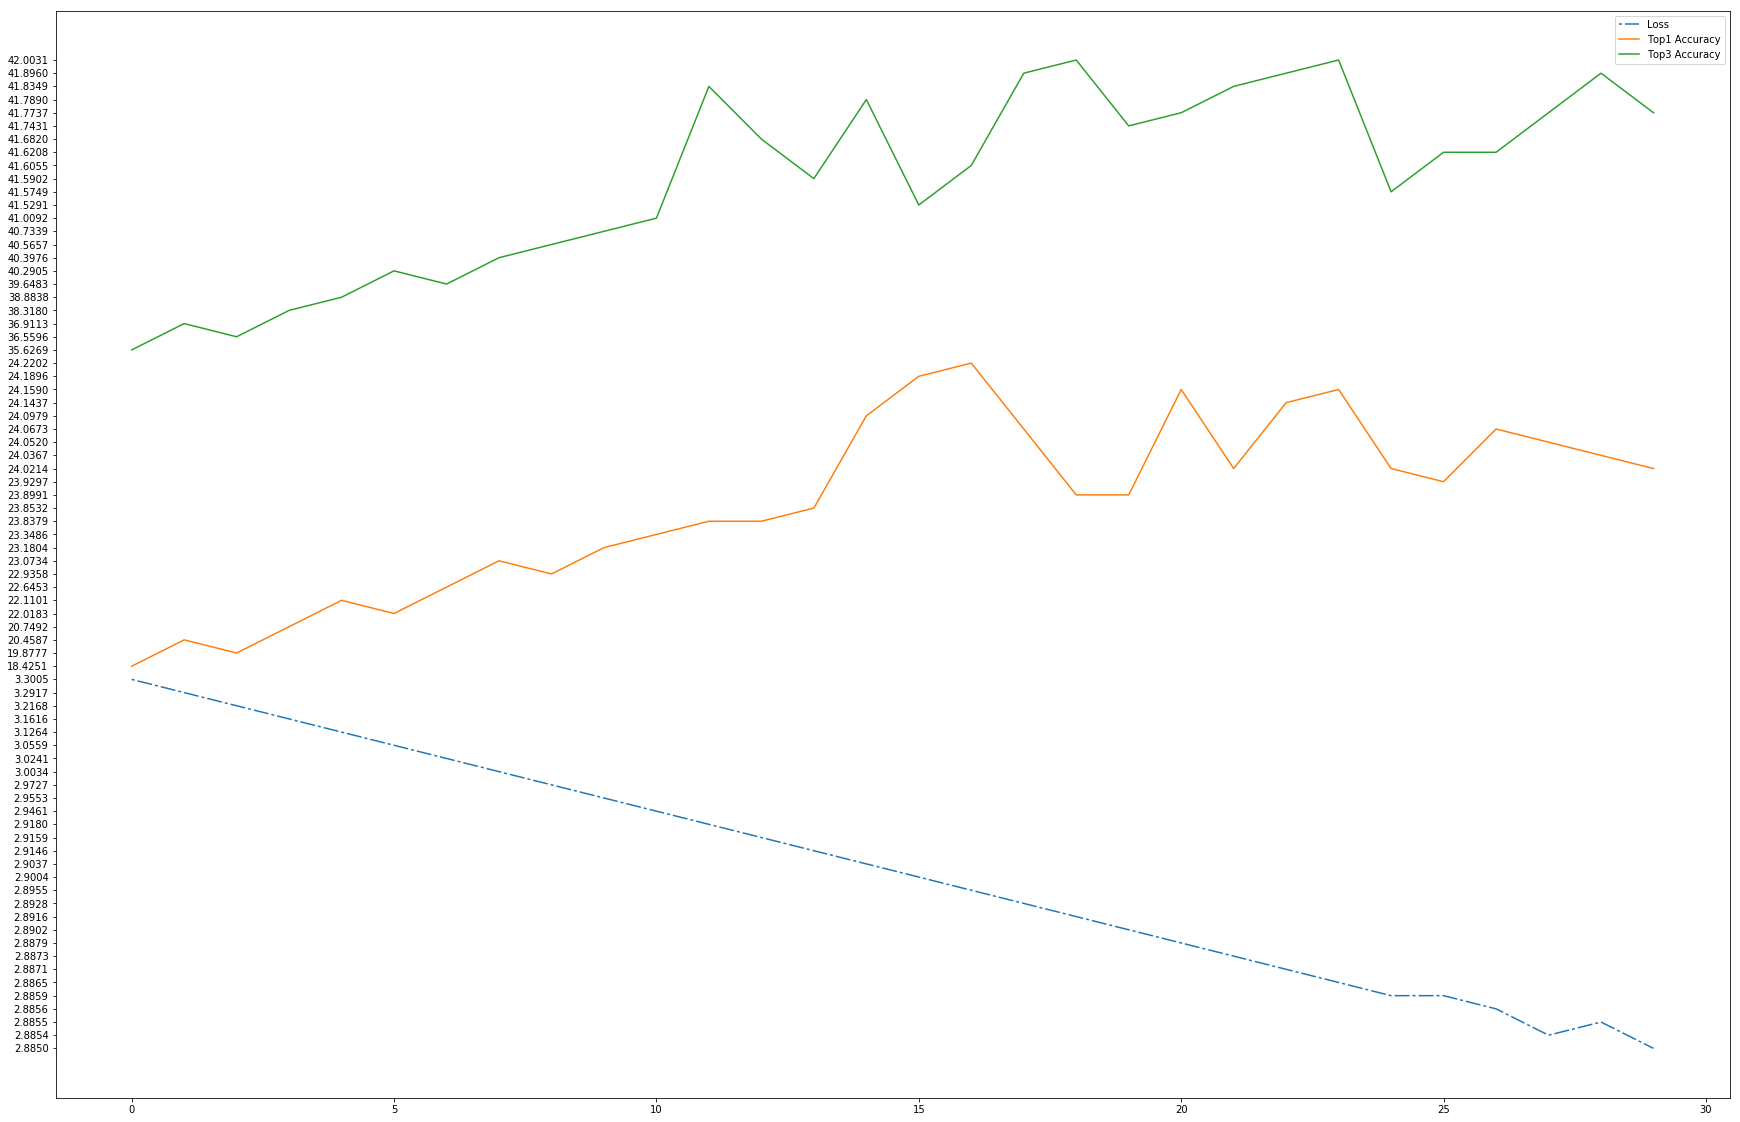

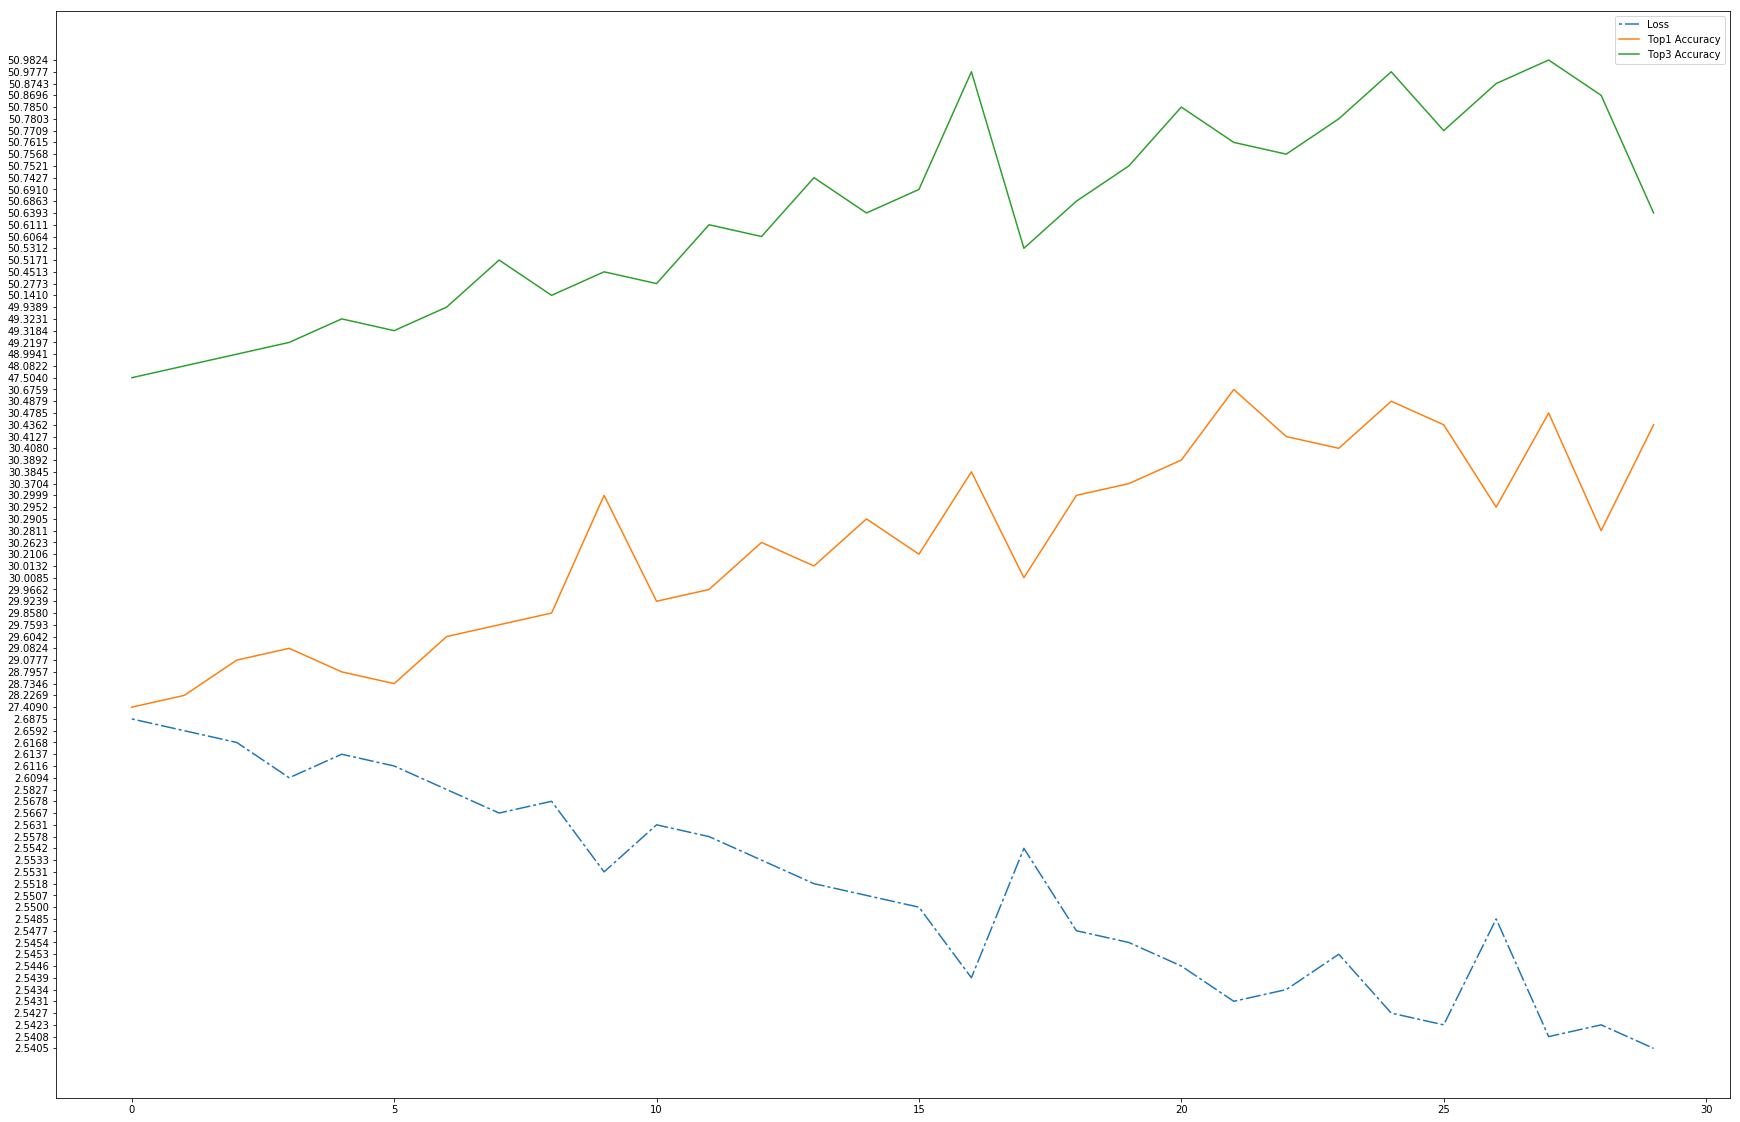

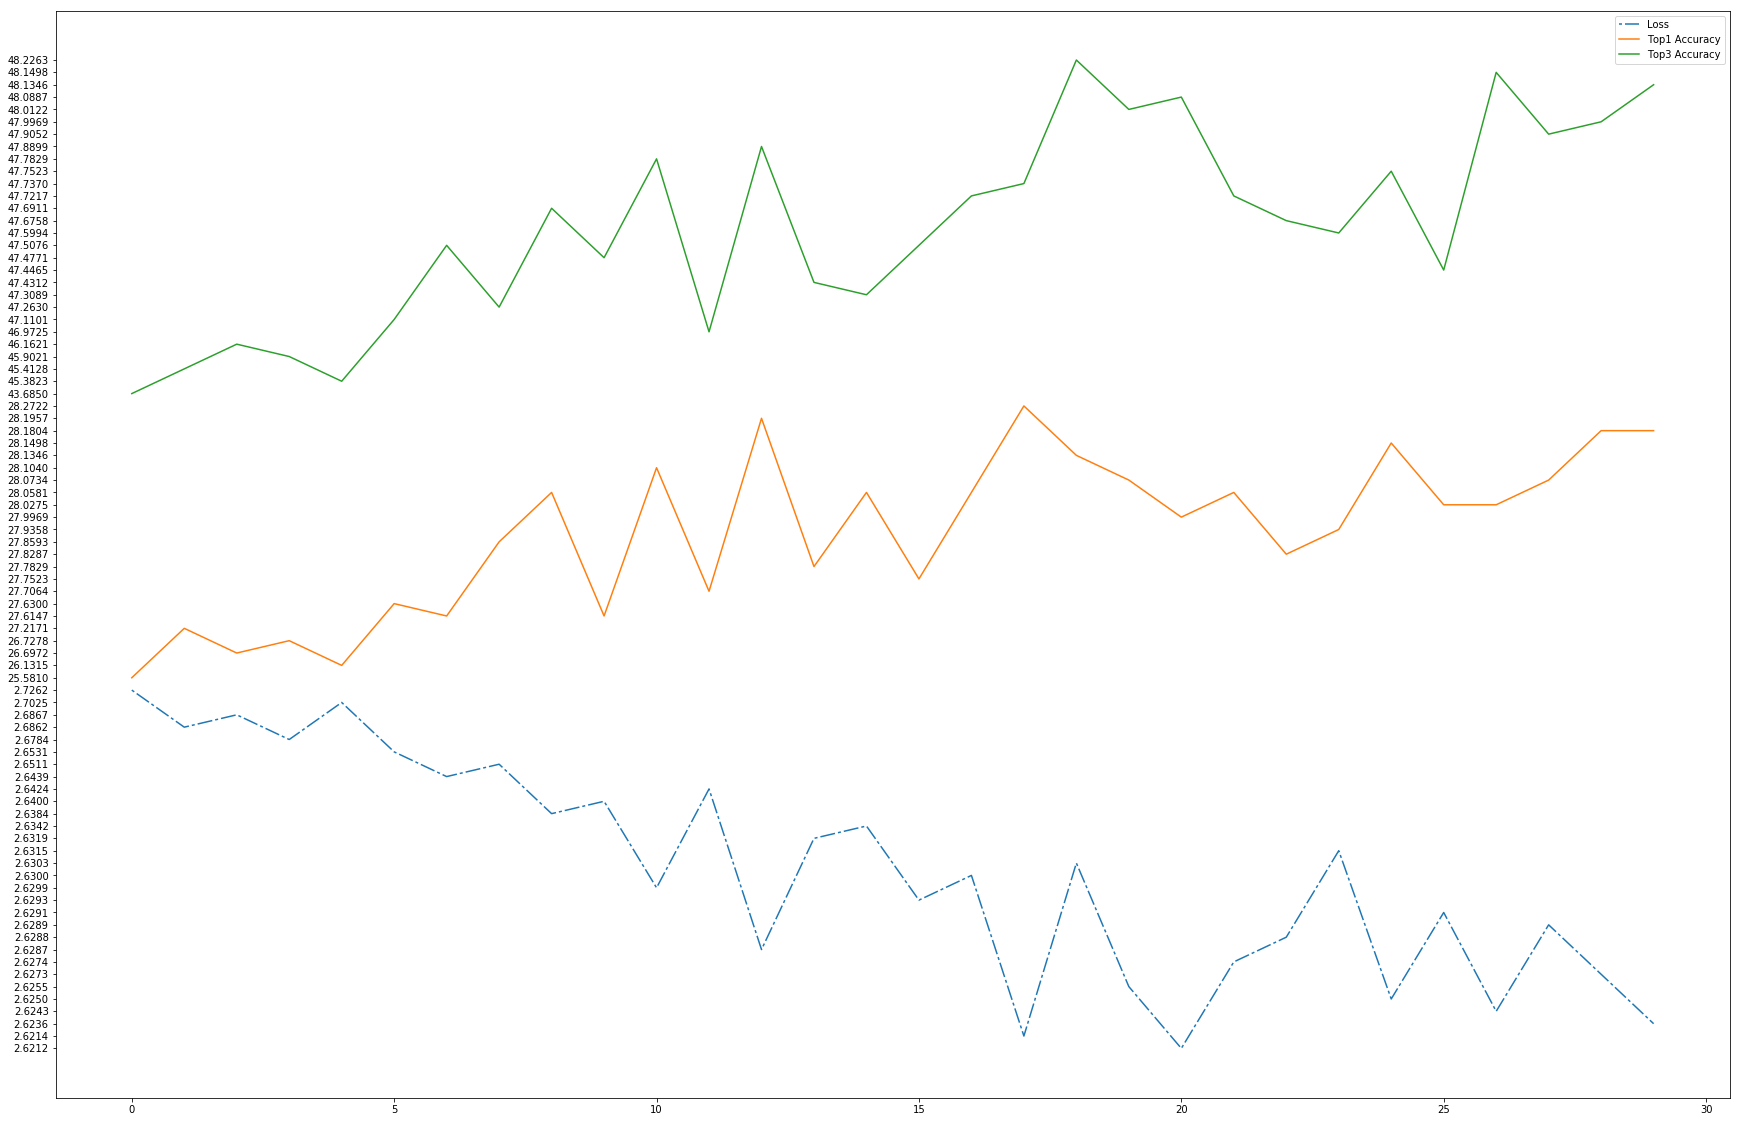

In [3]:
### Load data from files
alexData = load_per_label(savedir_alex, dataset_alex_name, 'test')
alexTop1, alexTop3 = load_acc(savedir_alex, dataset_alex_name, 'test')
alexLearning = load_learning(savedir_alex, dataset_alex_name, 'validation')

alexNormData = load_per_label(savedir_alexNorm, dataset_alex_name, 'test')
alexNormTop1, alexNormTop3 = load_acc(savedir_alexNorm, dataset_alex_name, 'test')
alexNormLearning = load_learning(savedir_alexNorm, dataset_alex_name, 'validation')

denseData = load_per_label(savedir_dense, dataset_dense_name, 'test')
denseTop1, denseTop3 = load_acc(savedir_dense, dataset_dense_name, 'test')
denseLearning = load_learning(savedir_dense, dataset_dense_name, 'validation')

denseNormData = load_per_label(savedir_denseNorm, dataset_dense_name, 'test')
denseNormTop1, denseNormTop3 = load_acc(savedir_denseNorm, dataset_dense_name, 'test')
denseNormLearning = load_learning(savedir_denseNorm, dataset_dense_name, 'validation')


### Display overall accuracies:
print('Top 1 accuracy: alexnet:' + alexTop1 + ', alexnet normalized:' + alexNormTop1 + ', densenet:' + denseTop1 + ', densenet normalized:' + denseNormTop1)
print('Top 3 accuracy: alexnet:' + alexTop3 + ', alexnet normalized:' + alexNormTop3 + ', densenet:' + denseTop3 + ', densenet normalized:' + denseNormTop3)


### Plot graphs for more in detail comparison of accuracies and training progress over time.
plot(alexData[:,0],alexData[:,1], 'alexnet Top 1' ,denseData[:,1], 'densenet Top 1', 'comp_alex_dense_top1.jpg')
plot(alexData[:,0],alexData[:,2], 'alexnet Top 3' ,denseData[:,2], 'densenet Top 3', 'comp_alex_dense_top3.jpg')
plot(alexNormData[:,0],alexNormData[:,1], 'alexnet Top 1' ,denseNormData[:,1], 'densenet Top 1', 'comp_alex_dense_norm_top1')
plot(alexNormData[:,0],alexNormData[:,2], 'alexnet Top 3' ,denseNormData[:,2], 'densenet Top 3', 'comp_alex_dense_norm_top3')

# Delete the two categories that dont have enought data and were deleted in the normlized dataset
alexData = np.delete(alexData,12,0)
alexData = np.delete(alexData,10,0)

denseData = np.delete(denseData,12,0)
denseData = np.delete(denseData,10,0)

plot(alexData[:,0],alexData[:,1], 'alexnet Top 1' ,alexNormData[:,1], 'alexnet normalized Top 1', 'comp_alex_notnorm_norm.jpg')
plot(denseData[:,0],denseData[:,1], 'densenet Top 1' ,denseNormData[:,1], 'densenet normalized Top 1', 'comp_dense_notnorm_norm.jpg')


plot_learning(alexLearning, 'learning_alex.jpg')
plot_learning(alexNormLearning, 'learning_alex_norm.jpg')
plot_learning(denseLearning, 'learning_dense.jpg')
plot_learning(denseNormLearning, 'learning_dense_norm.jpg')